# NLP with Hotel Review Part 2

The following notebook is a continuation of the previous project submission focused on leveraging DSML-based techniques surrounding mostly unstructured hotel review data. While the previously submitted notebook was focused on data preparation and vectorization, this notebook will be focused on leveraging clean datasets for modeling and implementation.

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1: Logistic Regression
#### Q1A: Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [366]:
#importing standard libraries for Logistic Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [478]:
#reading in the clean datasets

train_df = pd.read_csv('clean_train_dataframe.csv')
test_df = pd.read_csv('clean_test_dataframe.csv')

In [479]:
display(train_df.head())
display(test_df.head())

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


When applying almost all modeling methodologies, it is necessary to split the dataset into training and testing sets. The purpose of this is to (1) reduce the possibility of overfitting by not training the model on all available data and (2) to understand model performance on production data throughout the development process. Another segmentation of data can be for model validation, which serves as an additional safeguard against overfitting and an additional gauge of model performance aside from the test set.

To perform this segmentation of the dataset, the standard function to use is the `train_test_split()` from the sklearn.model_selection package. However, separate datasets have already been provided for train and test data, removing the need to use it. It will be leveraged later in the notebook when a separate validation set becomes necessary.

To properly assign the provided datasets as model inputs, we'll need to (1) separate the feature set from the target variable and (2) convert the dataframe into a numpy array for modeling. Since the target variable needs to be a 1D array, we are leveraging the `.ravel()` function.

In [480]:
#splitting df into X and y variables to act as model inputs

X_train = train_df.iloc[:, :2743].to_numpy()
y_train = train_df.iloc[:, 2743:].to_numpy().ravel()

X_test = test_df.iloc[:, :2743].to_numpy()
y_test = test_df.iloc[:, 2743:].to_numpy().ravel()

Once train and test splits are complete, the next step is to scale the data to create a layer of normalization across the dataset. This process creates a level of uniformity for the model, as opposed to operating on an unconventional number scale that is specific to the dataset.

In [481]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Once train and test splits are completed and the data is scaled, we can move forward with our initial model development. We set the solver to `lbfgs`, which is the default algorithm used for Logistic Regression via the sklearn package. We also set the `max_iter` to 1000 to avoid any warning messages or memory issues of the model running too many iterations.

In [371]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 1)
model = logreg.fit(X_train_scaled, y_train)

print(f'Train Score: {model.score(X_train_scaled, y_train)}')
print(f'Test Score: {model.score(X_test_scaled, y_test)}')

Train Score: 0.885841537740272
Test Score: 0.7328333723927818


Although not implictly asked for this section, below is a model performance report and confusion matrix for the Logistic Regression model. These numbers provide us with a baseline for preliminary model performance. 

Below, we see that of the 4,267 test samples, the model predicted 3,127 correct (both True Positive and True Negative). The False Positives and False Negatives were split relatively evenly. However, we see ~8-9 basis point difference in model performance between Negative and Positive labels, indicating that the model is better at detecting Positive Sentiment versus Negative Sentiment.

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1809
           1       0.77      0.77      0.77      2458

    accuracy                           0.73      4267
   macro avg       0.73      0.73      0.73      4267
weighted avg       0.73      0.73      0.73      4267



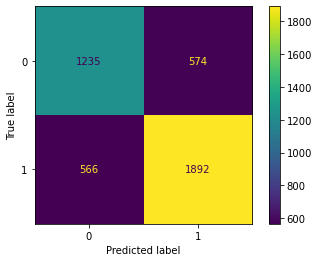

In [372]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cols = test_df['rating'].unique()
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= cols )
cm_display.plot()
plt.show()

#### Q1B: What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question.

To identify the words and additional features that have the most predictive power for the model above, we'll move forward with the following steps:
1. Filter dataset for only positive reviews
2. Create a separate dataframe that stores each word and their predictive power, which is represented by the coefficients produced for each word by the model
3. Plot said words and coefficients to better visualize these word trends

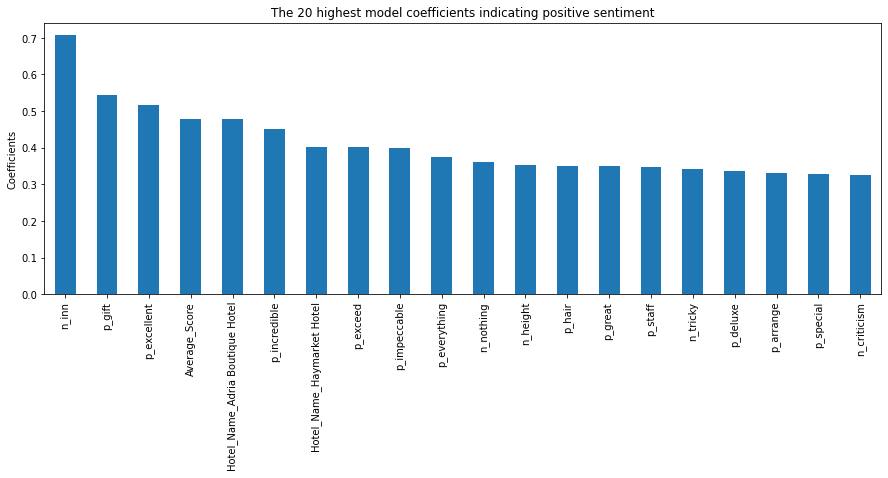

In [373]:
pos_review_columns = train_df[train_df['rating'] == 1].iloc[:, :2743].columns
pos_word_counts = pd.DataFrame({'coefficients': model.coef_[0]}, index = pos_review_columns).sort_values('coefficients', ascending = False)

pos_word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.show()

We perform the same steps for negative reviews as we did above.

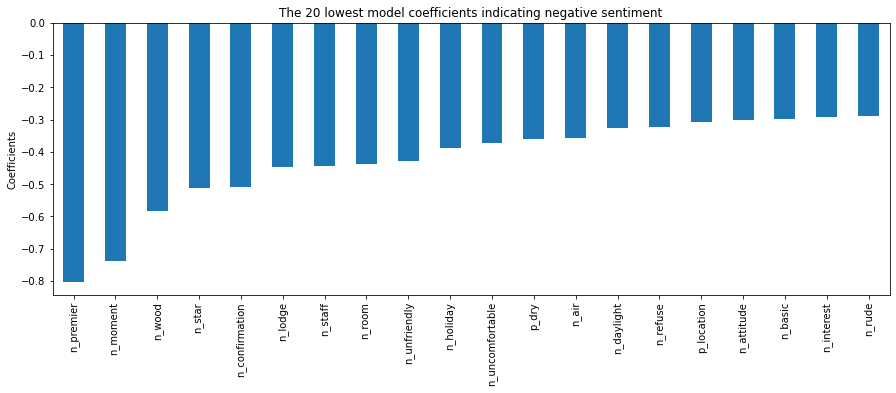

In [374]:
neg_review_columns = train_df[train_df['rating'] == 0].iloc[:, :2743].columns
neg_word_counts = pd.DataFrame({'coefficients': model.coef_[0]}, index = neg_review_columns).sort_values('coefficients', ascending = True)

neg_word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.show()

#### Q1C: Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

Principle Component Analysis is a modeling methodology used to reduce the size of the dataset without sacrificing key data points for model inference and predictive performance. 

Simply put, PCA attempts to summarize the relationships between features based on the strength of variance. By identifying the linear relationships between multiple features, PCA can represent these relationships through a smaller number of components, leading to reduced model development timelines and potentially better model performance.

In [375]:
from sklearn.decomposition import PCA

pca_ = PCA()
pca_.fit(X_train_scaled)

X_train_PCA = pca_.transform(X_train_scaled)
X_test_PCA = pca_.transform(X_test_scaled)

The `.explained_variance` object helps visualize the represenation to variance that is captured by each component. In a vacuum, it can be difficult to fully understand its significance, which is why we leveraged `explained_variance_ratio_` below. This object presents the percentage of variance captured by each component relative to the total variance presented by the feature set. There are a number of ways to fully leverage these to objects to optimize model throughput and performance.

The first method to to plot the `explained_variance_ratio_`, which is known as the Elbow plot. The idea is to identify the point of diminishing returns regarding the number of principle components to leverage relative to the percentage of variance captured. This can be useful for a dataset with a large, but smaller number of features compared to our Hotel Review dataset.

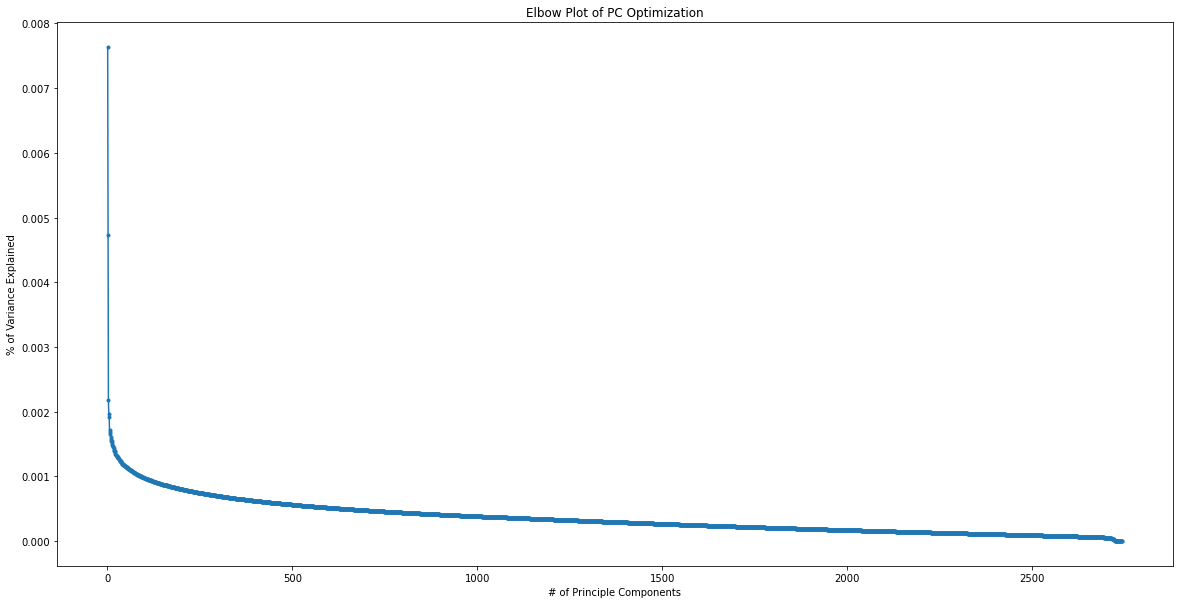

In [376]:
var_ratio = pca_.explained_variance_ratio_

plt.figure(figsize = (20,10))
plt.plot(range(1,2744), var_ratio, marker = '.')
plt.xlabel('# of Principle Components')
plt.ylabel('% of Variance Explained')
plt.title('Elbow Plot of PC Optimization')
plt.show()

Unfortunately, due the number of potential PCs (which is the same number as the number of features in our dataset), this graph is difficult to pinpoint the exact point of diminishing returns.

Another way to leverage explain_variance_ratio_ is to create a cumulative summation of the variance captured, and set a predefined threshold of the preferred variance capture. This is shown below, with a predefined threshold of 90%.

<Figure size 432x288 with 0 Axes>

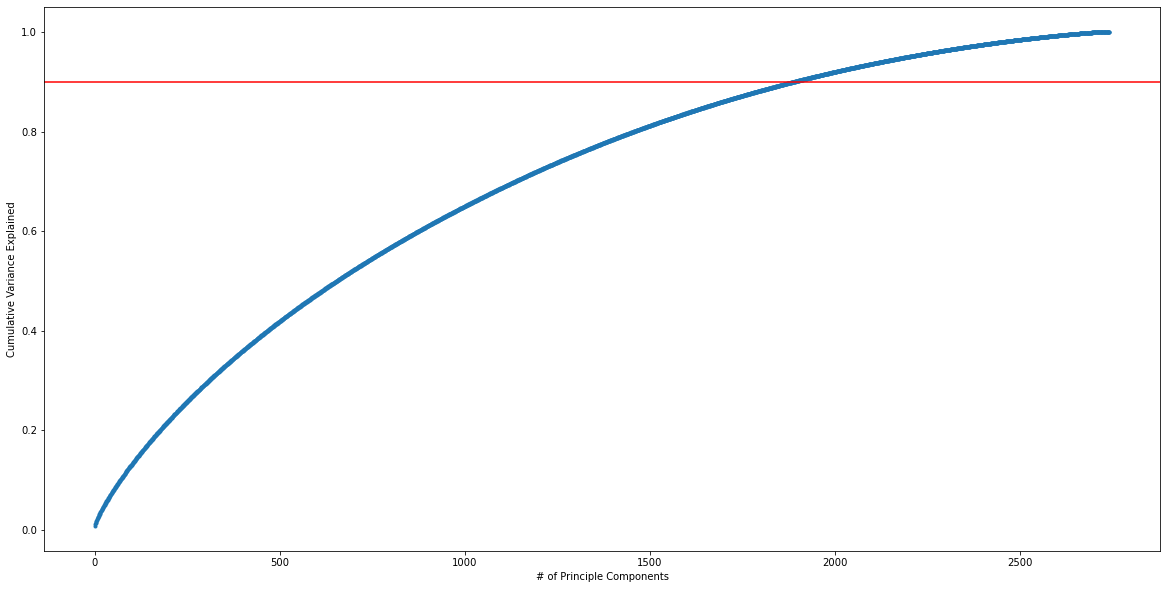

In [377]:
cum_sum = np.cumsum(var_ratio)

plt.figure()
plt.figure(figsize = (20,10))
plt.plot(range(1,2744), cum_sum, marker = '.')
plt.axhline(0.9, c = 'r')
plt.xlabel('# of Principle Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

This graphical depiction is much more legible, but it is still difficult to identify the exact number of PCs that represents 90% of the variance within the feature set. Luckily, the PCA package in sklearn addresses this by allowing a decimal parameter for n_components. n_components now serves 2 functions; (1) input for the total number of PCs to incorporate into the transformer (must be `equal >= 1`) or (2) input the pre-defined variance capture threshold, where the function will automatically transform the data with the number of PCs required to meet said threshold (input must be between 0 and 1).

In [378]:
pca_ = PCA(n_components = 0.9)
pca_.fit(X_train_scaled)

X_train_PCA = pca_.transform(X_train_scaled)
X_test_PCA = pca_.transform(X_test_scaled)

print(f'Original Feature Set Shape: {X_train.shape}')
print(f'PCA Transformed Shape: {X_train_PCA.shape}')

Original Feature Set Shape: (12798, 2743)
PCA Transformed Shape: (12798, 1891)


By specifying our 90% threshold, we see 1,891 PCs included in that dataset, as opposed to the 2,743 features in the original dataset. This number aligns with the Cumulative graph above.

##### Runtime
One of the key benefits to PCA is the decrease in model runtime. While this may not seem important in the context to a locally run Jupyter notebook, runtime can be essential for online model implementations and pipelines. Below, we compare the runtime of the original model and the new PCA-transformed model to document the speed differences.

In [379]:
# assigning a new model to the PCA Logistic Regression, ensuring it as the same parameters as the original model /
# for proper benchmarking

pca_logreg = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 1)

In [380]:
%%timeit
logreg.fit(X_train_scaled, y_train)

3.73 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [381]:
%%timeit
pca_logreg.fit(X_train_PCA, y_train)

2.16 s ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [382]:
print(f'Original Train & Test Scores: {logreg.score(X_train_scaled, y_train)}, {logreg.score(X_test_scaled, y_test)}')
print(f'PCA Train & Test Scores: {pca_logreg.score(X_train_PCA, y_train)}, {pca_logreg.score(X_test_PCA, y_test)}')

Original Train & Test Scores: 0.885841537740272, 0.7328333723927818
PCA Train & Test Scores: 0.854742928582591, 0.7661120224982423


A couple of important things to note, which highlight the advantages and disadvantages of PCA and dimensionality reduction in general:
1. Positives:

- Over 1.5 seconds of reduced runtime! For a fairly small dataset, the difference may seem negligible, but from both a model development and implementation persepctive, this represents a huge benefit regarding time to value, cost of development, and cost of processing power/hardware needed.

- Decreased Train performance, but increased Test Performance, shows how PCA can also mitigate instances of overfitting. Since individual features are compressed and summarized, it lessens the chance of a model learning too intently on a specific set of features. However, the model still retains the relationships and predictive power of the feature set without sacrificing overall performance on the test set.

2. Negatives

- While it may sound contradictory, it is important to remain cognizant of the reduced features within the dataset. Although PCA has proven to be fruitful, the interpretation of summarized features via linear relationships becomes more complex, especially if your model's use case is reliant on "explainable AI".

- Non-linear relationships across features can reduce the value-add that PCA provides. Since principle components are linear combinations, the number of PCs may need to increase to fully capture the required variance thresholds deemed necessary, which reduces the overall value proposition regarding dimensionality reduction.

## Q2: KNN
- Fit a KNN model to this data. What is the accuracy score on the test set?
- KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?
- List one advantage and one disadvantage of reducing the number of observations.
- Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.
- What is the issue with splitting the data into train and validation sets after performing vectorization?

In [482]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)

print(f' KNN Train Score: {KNN.score(X_train_scaled, y_train)}')
print(f' KNN Test Score: {KNN.score(X_test_scaled, y_test)}')

 KNN Train Score: 0.751211126738553
 KNN Test Score: 0.6367471291305367


In [483]:
from sklearn.model_selection import train_test_split

X_sample, X_remainder, y_sample, y_remainder = train_test_split(X_train_scaled, y_train, test_size = 0.5, random_state = 1)

In [484]:
KNN = KNeighborsClassifier()
KNN.fit(X_sample, y_sample)

print(f' KNN Train Score: {KNN.score(X_sample, y_sample)}')
print(f' KNN Test Score: {KNN.score(X_test_scaled, y_test)}')

 KNN Train Score: 0.7616815127363651
 KNN Test Score: 0.630653855167565


In [485]:
%%timeit
KNN.fit(X_train_scaled, y_train)

15.9 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [486]:
%%timeit
KNN.fit(X_sample, y_sample)

7.97 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
k_values = list(range(1, len(X_sample) + 1, 2))
train_scores = []
val_scores = []

for k in k_values:

    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_sample, y_sample)

    train_scores.append(KNN.score(X_sample, y_sample))
    val_scores.append(KNN.score(X_remainder, y_remainder))

plt.figure(figsize=(10, 7))
plt.plot(k_values, train_scores, c="blue", label="train")
plt.plot(k_values, val_scores, c="red", label="validation")
plt.xlabel("N Neighbors")
plt.ylabel("Accuracy")
plt.title("Optimal K")
plt.legend()
plt.show()

## Q3: Decision Trees

#### Q3A: Fit a decision tree model to this data. What is the accuracy score on the test set?

The next model methodology to explore is decision trees. We'll be leveraging the `DecisionTreeClassifier`, as opposed to the `DecisionTreeRegressor`, since as mentioned, the current target variable is a classification problem.

We'll continue to use the StandardScaler() data that was performed towards the beginning of the notebook for consistency and readability, although it is important to note that **scaled data does not affect decision trees, since each feature is analyzed independently.**

In [384]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print(f'Decision Tree Train Score: {dt.score(X_train_scaled, y_train)}')
print(f'Decision Tree Test Score: {dt.score(X_test_scaled, y_test)}')

Decision Tree Train Score: 1.0
Decision Tree Test Score: 0.6995547222873213


The obvious issue above, which is one of the primary issues with Decision Trees in general, is overfitting. Without assigning the depth of the tree, Decision Trees tend to go as deep as necessary to optimize fit for the training set it is exposed to. The following parts within this section attempt to address this issue.

#### Q3B: Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

To find the optimal depth of the tree, we'll need to train and test the model, but without using our test set. This is where the Validation set mentioned previously becomes essential.

We'll leverage the train_test_split object within sklearn to segment the training dataset into train and validation sets.

In [385]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size = .2, random_state = 1)

Once segmented, we'll run a for loop to fit the model on the train set split at a variety of different depths. Within the loop, we'll collect the model performance for both the train set performance and the validation set performance, identifying the optimal tree depth where (1) the validation set performs optimally and (2) the model does not overfit to the training set.

In [386]:
depth = list(range(1, 100))
train_scores = []
val_scores = []

for d in depth:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train_split, y_train_split)
    
    train_scores.append(dt.score(X_train_split, y_train_split))
    val_scores.append(dt.score(X_val_split, y_val_split))

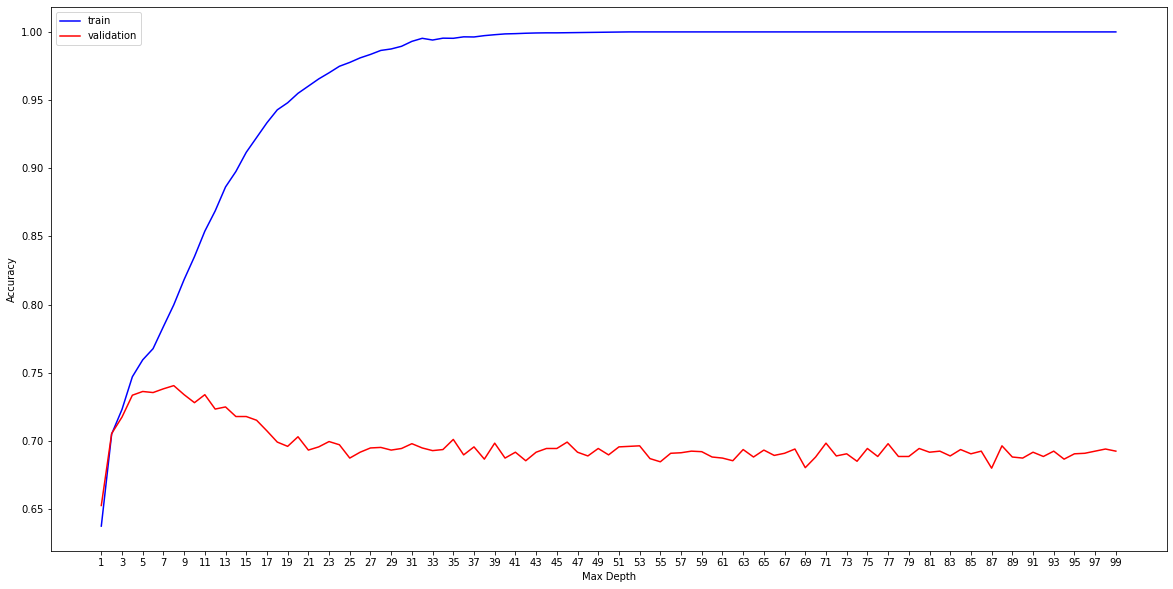

In [387]:
plt.figure(figsize = (20, 10))
plt.plot(depth, train_scores, c = 'blue', label = 'train')
plt.plot(depth, val_scores, c = 'red', label = 'validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(range(1,100, 2))
plt.legend()
plt.show()

Above, we see the model's peak performance on the validation set at `max_depth = 8`. Luckily, while the training performance at that depth is much better than the validation set, it does not reach the level of overfitting we saw without a defined max_depth parameter.

From this analysis, we've deemed the `max_depth = 8` is the optimial depth for this dataset.

In [388]:
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train_scaled, y_train)

print(f'Decision Tree Train Score: {dt.score(X_train_split, y_train_split)}')
print(f'Decision Tree Validation Score: {dt.score(X_val_split, y_val_split)}')
print(f'Decision Tree Test Score: {dt.score(X_test_scaled, y_test)}')

Decision Tree Train Score: 0.794295760890799
Decision Tree Validation Score: 0.786328125
Decision Tree Test Score: 0.7459573470822592


Compared to the original test score to .698, the new model performance of .745 represents a healthy increase in overall model performance while ensuring that the risk of overfitting was mitigated

#### Q3C: Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

Positives:

- One advantage of decision trees, compared to KNNs, is the reduction in computing power needed. KNNs measure distance across all existing and new data points relative to all other data points, which can lead to time- and resource-intensive models, especially for larger datasets.

- Another advantage of Decision Trees is its explainability. Since it performs binary decisions on defined feature aspects, the outputs are relatively easy to analyze compared to other ML techniques, such as KNNs. Part of this explainability is the fact the Decision Trees can handle categorical data without the need for encoding or dummy variables.

Negatives:

- The risk is overfitting for Decision Trees is very large. While there are measures that can be put into place, as seen above, they are entirely reactive to historical data and rely on binary decisions within said historical data to have predictive power. Although technically all ML models rely on past data, KNNs can handle a bit more nuance regarding the relationships across features.

- Decision Trees can get very large if the dataset is relatively complex or frequently changes. With KNNs, there is more flexibility regarding the number of the centroids created, which makes nuanced and multiclassification problems a bit easier to implement and maintain.

## Q4: What is the purpose of the validation set, i.e., how is it different than the test set?

In my experience, based on this class and professional experience, there are two main use cases for a separate validation set, in addition to a train and test set.

The first, which has been specified above in this notebook, is to gauge model performance throughout the development process without leveraging your test data. Although data is readily available for projects and small experiments, it can be scarce within specialized use cases or domains. Splitting the train set into a train and validation set allows for understanding opportunities for model improvement, without wasting a test set that is usually seen as the last step before model deployment/implementation.

The second, which is something specific to my work experience, is that validation sets can be incredibly useful for changes in internal or external environments. For example, if a model was previously trained and tested on a specific dataset, but said dataset may be stale in terms of changing business dynamics or available data inputs, a validation set can be the deciding factor regarding investment in model iterations or even new model development.

## Q5: Cross Validation & Model Performance
#### Q5A: Perform a 5-fold cross validation to optimize the hyperparameters of your model.

Previously in this notebook, we've performed a number of methods to prevent overfitting, such as dimensionality reduction, sampling, and optimization of model parameters.

Cross validation is another form of risk mitigation in regards to overfitting. While splitting train and validation sets provides us with another layer of differentiation and analysis, models can still overfit depending on the slice of data it was given to train on.

The idea behind cross validation is that if we have numerous stages of data splits, we can increase the diversity of the data the model is trained on and reduce the chances of overfitting. Theoretically, these splits can scale almost infinitely, which is where K-Fold Cross Validation comes in. As opposed to constantly splitting data into every possible combination, K-Fold partitions the data into groups. Each group, or fold, represents a different grouping of the data, where the number of folds can be defined as a parameter.

The average model performance across each fold is treated as the true model performance. When combining this performance score with certain optimization parameters, you can identify the optimal hyperparameter that aligns with the highest model performance score.

For this example, we'll leverage a Logistic Regression parameter, whose hyperparameter is defined as C, or the strength of regularization the model performs.

In [389]:
#import necessary objects for cross validation
from sklearn.model_selection import cross_val_score

#empty list to store cross validation scores
cv_score_list = []

#range of potential regularization parameters
c_range = np.array(
    [
        0.00000001,
        0.0000001,
        0.000001,
        0.00001,
        0.0001,
        0.001,
        0.1,
        1,
        10,
        100,
        1000,
        10000,
        100000,
        1000000,
        10000000,
        100000000,
        1000000000,
    ]
)

for c in c_range:
    #initiate model with varying levels of regularization
    cv_logreg = LogisticRegression(C = c, solver = 'lbfgs', max_iter = 1000, random_state = 1)
    #take the average of validation scores
    cv_score = np.mean(cross_val_score(cv_logreg, X_train_scaled, y_train, cv = 5))
    #append cross validation score list
    cv_score_list.append(cv_score)

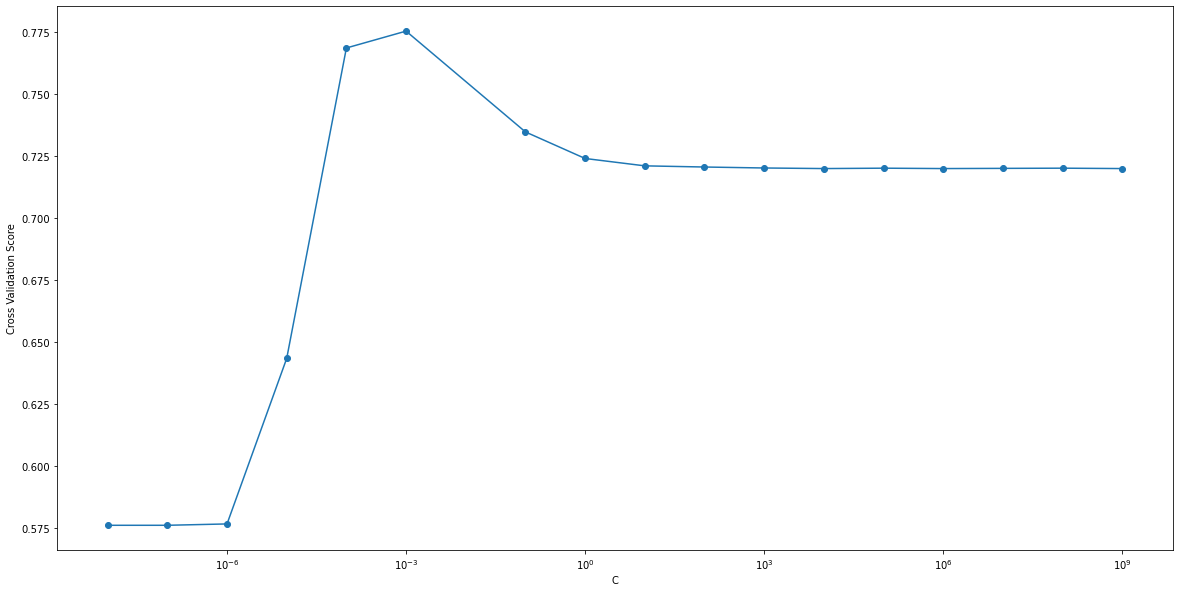

The regularization parameter (C) was the highest model performance is 0.001


In [390]:
plt.figure(figsize = (20,10))
plt.plot(c_range, cv_score_list, marker = 'o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross Validation Score')
plt.grid
plt.show()

c_max = np.array(cv_score_list).argmax()

print(f'The regularization parameter (C) was the highest model performance is {c_range[c_max]}')

Based on the graphical depiction of our findings, the highest average cross validation score (using 5 folds), is .001. C is actual the inverse of regularization strength, meaning that the optimal hyperparameter for the Logistic Regression model on the Hotel Review dataset is relatively strong. In an ideal state, it is preferred for C to be weaker than this, since strong regularization could be a sign of overfitting. A potential way to address this may be additional feature engineering or additional folds within the K-Fold Cross Validation.

In [391]:
final_logreg = LogisticRegression(C = c_range[c_max], solver = 'lbfgs', max_iter = 1000, random_state = 1)
final_logreg.fit(X_train_scaled, y_train)
final_logreg.score(X_test_scaled, y_test)

0.777595500351535

Compared to our original Logistic Regression test performance of .73 and our PCA-transformed test performance of .76, the .77 performance represents an increase in overall model performance.

Below, we'll combine our PCA-transformed model and rerun the hyperparameter optimization methods perfomed above to see if we can gain incremental performance improvements.

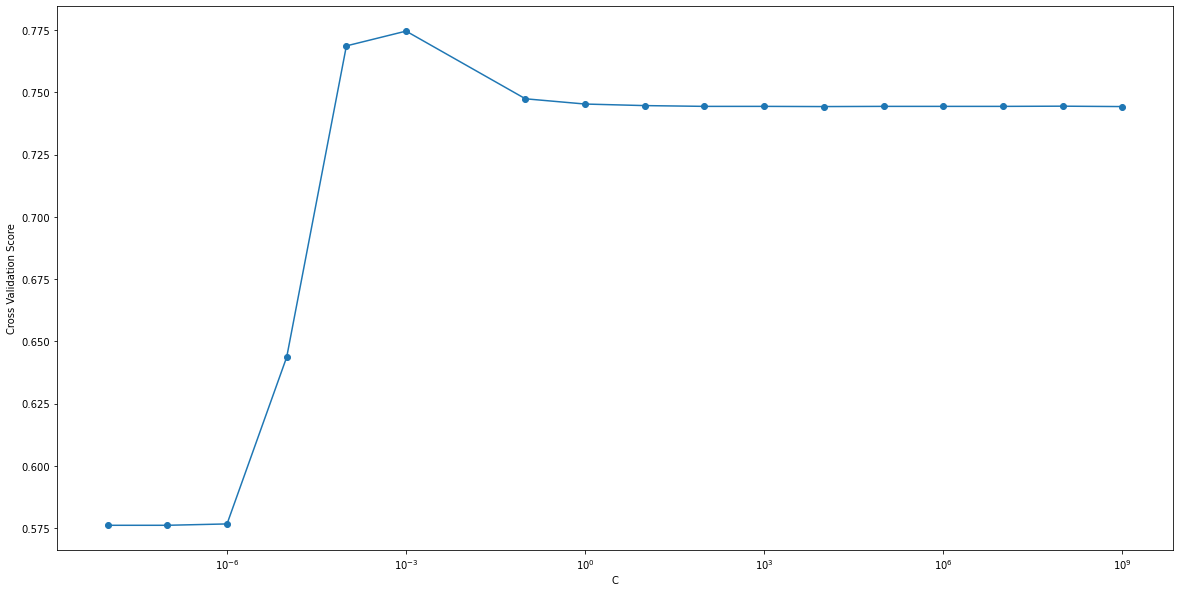

The regularization parameter (C) was the highest model performance is 0.001


In [392]:
#import necessary objects for cross validation
from sklearn.model_selection import cross_val_score

#empty list to store cross validation scores
cv_score_list = []

#range of potential regularization parameters
c_range = np.array(
    [
        0.00000001,
        0.0000001,
        0.000001,
        0.00001,
        0.0001,
        0.001,
        0.1,
        1,
        10,
        100,
        1000,
        10000,
        100000,
        1000000,
        10000000,
        100000000,
        1000000000,
    ]
)

for c in c_range:
    #initiate model with varying levels of regularization
    cv_logreg = LogisticRegression(C = c, solver = 'lbfgs', max_iter = 1000, random_state = 1)
    #take the average of validation scores
    cv_score = np.mean(cross_val_score(cv_logreg, X_train_PCA, y_train, cv = 5))
    #append cross validation score list
    cv_score_list.append(cv_score)

plt.figure(figsize = (20,10))
plt.plot(c_range, cv_score_list, marker = 'o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross Validation Score')
plt.grid
plt.show()

c_max = np.array(cv_score_list).argmax()

print(f'The regularization parameter (C) was the highest model performance is {c_range[c_max]}')

In [393]:
final_logreg_PCA = LogisticRegression(C = c_range[c_max], solver = 'lbfgs', max_iter = 1000, random_state = 1)
final_logreg_PCA.fit(X_train_PCA, y_train)
final_logreg_PCA.score(X_test_PCA, y_test)

0.7808764940239044

While less than a .01 point improvement in model performance, the PCA-transformed Logistic Regression + K-Fold Cross-Validated hyperparameter tuning has proven to be the best-performing Logistic Regression model we've achieved throughout this notebook.

#### Q5B: What does your confusion matrix look like for your best model on the test set?
As performed earlier, we'll again produce a performance breakdown and confusion matrix of the best-performing Logistic Regression model we've achieved.

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1809
           1       0.80      0.83      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.78      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



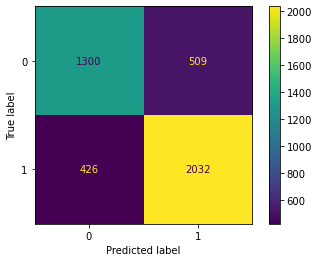

In [394]:
y_pred = final_logreg_PCA.predict(X_test_PCA)
print(classification_report(y_test, y_pred))

y_pred = final_logreg_PCA.predict(X_test_PCA)
cm = confusion_matrix(y_test, y_pred)
cols = test_df['rating'].unique()
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= cols )
cm_display.plot()
plt.show()

While the model continues to perform better at detecting Positive Sentiment compared to Negative Sentiment, there is significant improvement across all model performance metrics relative to the original Logistic Regression model run at the start of the notebook.

## Q6: Feature Creation
#### Q6A: Explain your new feature and why you consider it will improve accuracy.

The process of feature engineering is a combination of both quantitative and qualitative analysis and knowledge. For a feature selection process that already involves a fairly large feature set, intuition is hinting at first relying on a qualitative approach to this problem and question.

When considering the bias within reviews -- whether it be for movies, restaurants, or anything else, reviewers tend to have a polarized view of their experience. When taking this into account, the next thought that comes to mind is the amount of content within these reviews. Someone who is very happy with their stay has has a good overall experience, which would lead to a summarized and compact review. On the otherhand, for someone who was unhappy with their experience, the review may be a bit lengthy in order to fully transcribe the issues with their experience.

Currently within our dataset, we have features for `Review_Total_Negative_Word_Counts` and for `Review_Total_Positive_Word_Counts`, but we don't account the total number of words within a review nor the ratio of positive or negative words relative to all words in a review.

Below are a couple of simple preliminary analyses to test this hypothesis.

Text(0, 0.5, 'Average Total Words')

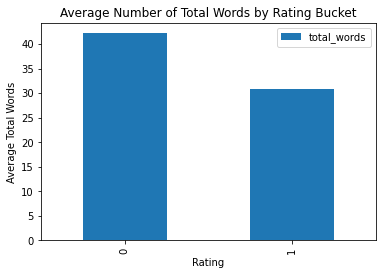

In [432]:
train_feature_df = train_df.copy()
test_feature_df = test_df.copy()

train_feature_df['total_words'] = train_feature_df['Review_Total_Negative_Word_Counts'] + train_feature_df['Review_Total_Positive_Word_Counts']
test_feature_df['total_words'] = test_feature_df['Review_Total_Negative_Word_Counts'] + test_feature_df['Review_Total_Positive_Word_Counts']

train_feature_df[['rating', 'total_words']].groupby('rating').mean().plot(kind = 'bar')
plt.title('Average Number of Total Words by Rating Bucket')
plt.xlabel('Rating')
plt.ylabel('Average Total Words')

From a very high-level, we see that the initial hypothesis of negative reviews skewing more total words has some basis. Let's dig into it a bit more to gauge statistical signifiance. Below is a simple Chi-Squared measurement and f_classif method to test statistical significance for categorical data.

In [433]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

tmp_df = train_feature_df[['total_words', 'rating']]

X_feature_test = np.array(tmp_df.iloc[:,0]).reshape(-1,1)
y_feature_test = tmp_df.iloc[:,1]

chi_feature_test = chi2(X_feature_test, y_feature_test)

chi_feature_test

(array([11099.42814075]), array([0.]))

In [434]:
tmp_df = test_feature_df[['total_words', 'rating']]

X_feature_test = np.array(tmp_df.iloc[:,0]).reshape(-1,1)
y_feature_test = tmp_df.iloc[:,1]

f_classif_test = f_classif(X_feature_test, y_feature_test)

f_classif_test

(array([79.55328929]), array([6.83376604e-19]))

Both tests show statistical significance for this data point.

#### Q6B: Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

In [465]:
#adding feature to dataset
train_df['total_words'] = train_df['Review_Total_Negative_Word_Counts'] + train_df['Review_Total_Positive_Word_Counts']
test_df['total_words'] = test_df['Review_Total_Negative_Word_Counts'] + test_df['Review_Total_Positive_Word_Counts']

In [ ]:
#rearranging columns
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

In [471]:
test_df = df_column_switch(test_df, 'total_words', 'rating')

In [472]:
train_df = df_column_switch(train_df, 'total_words', 'rating')

In [475]:
#model development
X_train = train_df.iloc[:, :2744].to_numpy()
y_train = train_df.iloc[:, 2744:].to_numpy().ravel()

X_test = test_df.iloc[:, :2744].to_numpy()
y_test = test_df.iloc[:, 2744:].to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_ = PCA(n_components = 0.9)
pca_.fit(X_train_scaled)
X_train_PCA = pca_.transform(X_train_scaled)
X_test_PCA = pca_.transform(X_test_scaled)

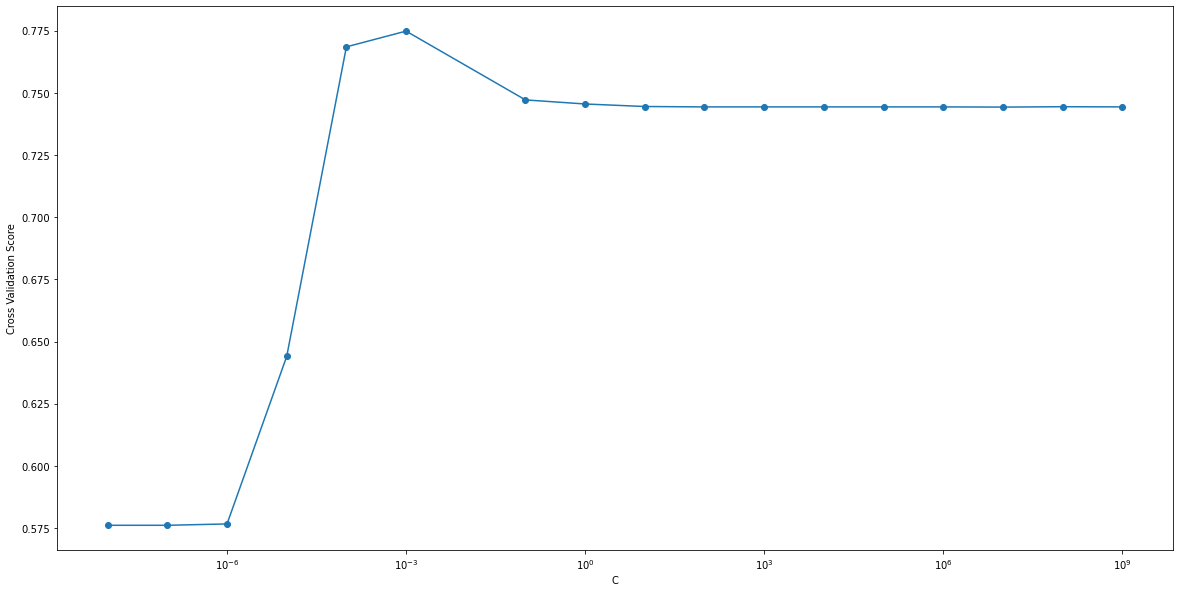

The regularization parameter (C) was the highest model performance is 0.001


In [476]:
#import necessary objects for cross validation
from sklearn.model_selection import cross_val_score

#empty list to store cross validation scores
cv_score_list = []

#range of potential regularization parameters
c_range = np.array(
    [
        0.00000001,
        0.0000001,
        0.000001,
        0.00001,
        0.0001,
        0.001,
        0.1,
        1,
        10,
        100,
        1000,
        10000,
        100000,
        1000000,
        10000000,
        100000000,
        1000000000,
    ]
)

for c in c_range:
    #initiate model with varying levels of regularization
    cv_logreg = LogisticRegression(C = c, solver = 'lbfgs', max_iter = 1000, random_state = 1)
    #take the average of validation scores
    cv_score = np.mean(cross_val_score(cv_logreg, X_train_PCA, y_train, cv = 5))
    #append cross validation score list
    cv_score_list.append(cv_score)

plt.figure(figsize = (20,10))
plt.plot(c_range, cv_score_list, marker = 'o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross Validation Score')
plt.grid
plt.show()

c_max = np.array(cv_score_list).argmax()

print(f'The regularization parameter (C) was the highest model performance is {c_range[c_max]}')

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1809
           1       0.80      0.83      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.78      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



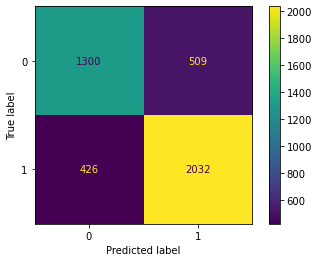

In [477]:
final_logreg_PCA = LogisticRegression(C = c_range[c_max], solver = 'lbfgs', max_iter = 1000, random_state = 1)
final_logreg_PCA.fit(X_train_PCA, y_train)
final_logreg_PCA.score(X_test_PCA, y_test)

y_pred = final_logreg_PCA.predict(X_test_PCA)
print(classification_report(y_test, y_pred))

y_pred = final_logreg_PCA.predict(X_test_PCA)
cm = confusion_matrix(y_test, y_pred)
cols = test_df['rating'].unique()
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= cols )
cm_display.plot()
plt.show()

Unfortunately, the new feature made no difference to the model performance. Additional analyses would be worthy of consideration, such as the distribution of positive and negative word usage within positive and negative reviews. Some high-level histograms are included below.

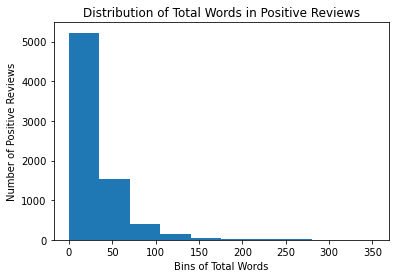

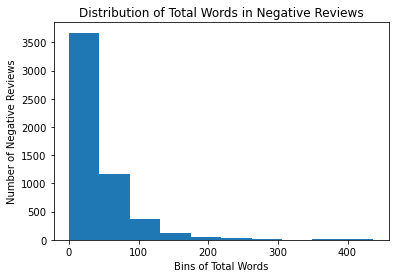

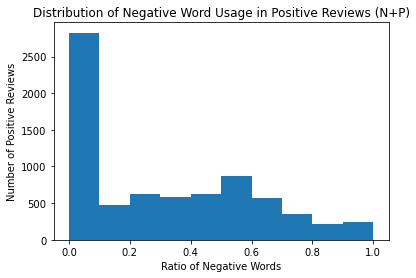

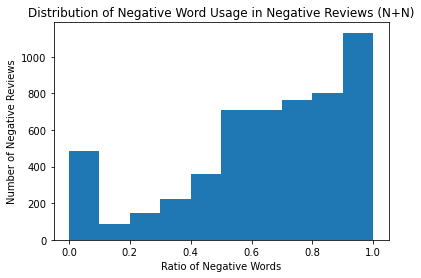

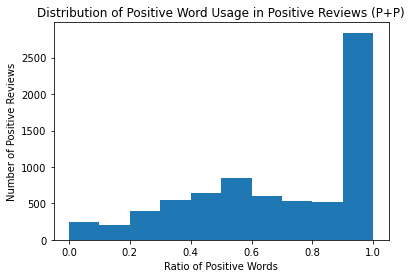

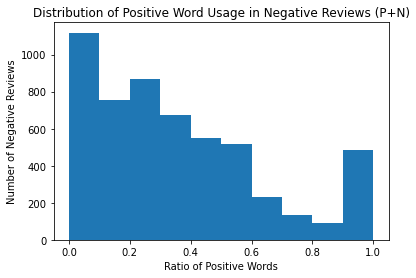

In [435]:
plt.figure()
plt.hist(train_feature_df['total_words'][train_feature_df['rating'] == 1], bins = 10)
plt.xlabel('Bins of Total Words')
plt.ylabel('Number of Positive Reviews')
plt.title('Distribution of Total Words in Positive Reviews')
plt.show()

plt.figure()
plt.hist(train_feature_df['total_words'][train_feature_df['rating'] == 0], bins = 10)
plt.xlabel('Bins of Total Words')
plt.ylabel('Number of Negative Reviews')
plt.title('Distribution of Total Words in Negative Reviews')
plt.show()

plt.figure()
plt.hist(train_feature_df['Review_Total_Negative_Word_Counts'][train_feature_df['rating'] == 1] / train_feature_df['total_words'][train_feature_df['rating'] == 1], bins = 10)
plt.xlabel('Ratio of Negative Words')
plt.ylabel('Number of Positive Reviews')
plt.title('Distribution of Negative Word Usage in Positive Reviews (N+P)')
plt.show()

plt.figure()
plt.hist(train_feature_df['Review_Total_Negative_Word_Counts'][train_feature_df['rating'] == 0] / train_feature_df['total_words'][train_feature_df['rating'] == 0], bins = 10)
plt.xlabel('Ratio of Negative Words')
plt.ylabel('Number of Negative Reviews')
plt.title('Distribution of Negative Word Usage in Negative Reviews (N+N)')
plt.show()

plt.figure()
plt.hist(train_feature_df['Review_Total_Positive_Word_Counts'][train_feature_df['rating'] == 1] / train_feature_df['total_words'][train_feature_df['rating'] == 1], bins = 10)
plt.xlabel('Ratio of Positive Words')
plt.ylabel('Number of Positive Reviews')
plt.title('Distribution of Positive Word Usage in Positive Reviews (P+P)')
plt.show()

plt.figure()
plt.hist(train_feature_df['Review_Total_Positive_Word_Counts'][train_feature_df['rating'] == 0] / train_feature_df['total_words'][train_feature_df['rating'] == 0], bins = 10)
plt.xlabel('Ratio of Positive Words')
plt.ylabel('Number of Negative Reviews')
plt.title('Distribution of Positive Word Usage in Negative Reviews (P+N)')
plt.show()